In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import Aer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q, c, name="test1")

qc.h(q[0])
qc.cx(q[0],q[1])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

backend = BasicAer.get_backend('qasm_simulator') #statevector_simulator, unitary_simulator
job = execute(qc, backend, shots=1024)
result = job.result()
counts  = result.get_counts(qc)
#outputstate = result.get_statevector(circ, decimals=3)

print(counts)
#print(outputstate)
#plot_state_city(outputstate)
#print(counts)
#plot_histogram(counts)
#print(result.get_statevector(qc, decimals=3))

{'11': 528, '00': 496}


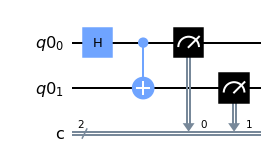

In [3]:
qc.draw(output='mpl')

In [15]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job = execute(qc, backend=backend, shots=shots)
job_monitor(job)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [ ]:
result = job.result()
print(result)

In [ ]:
counts_exp = result.get_counts(qc)
plot_histogram([counts_exp,counts])

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


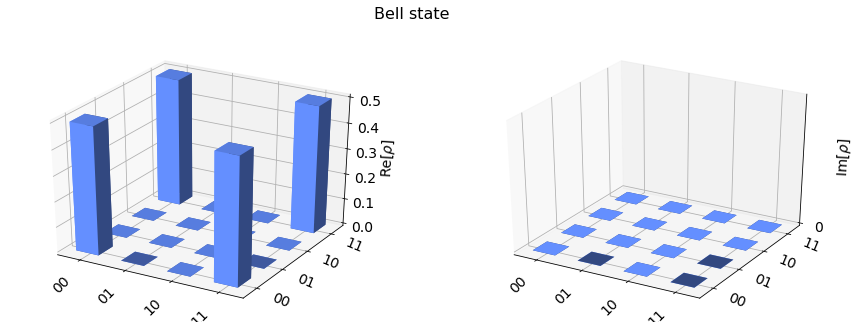

In [57]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print(statevector)
plot_state_city(statevector, title='Bell state')